Data Preprocessing Phase

In [1]:
#Importing Pandas Library for Data preprocessing
import pandas as pd

In [4]:
#Reading the dataset and understanding the attributes of the dataset given.
df = pd.read_csv("/content/in-vehicle-coupon-recommendation.csv",on_bad_lines="skip")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [6]:
#Finding the columns which has null values using isnull() method
null_df = df.isnull()
print(null_df)

       destination  passanger  weather  temperature   time  coupon  \
0            False      False    False        False  False   False   
1            False      False    False        False  False   False   
2            False      False    False        False  False   False   
3            False      False    False        False  False   False   
4            False      False    False        False  False   False   
...            ...        ...      ...          ...    ...     ...   
12679        False      False    False        False  False   False   
12680        False      False    False        False  False   False   
12681        False      False    False        False  False   False   
12682        False      False    False        False  False   False   
12683        False      False    False        False  False   False   

       expiration  gender    age  maritalStatus  ...  CoffeeHouse  CarryAway  \
0           False   False  False          False  ...        False       True   

In [10]:
#These columns have the null values reprsented by NaN, in which the column 'car' has maximum null values.
df[['car','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']].head(20)

,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
0,NaN,never,never,NaN,4~8,1~3
1,NaN,never,never,NaN,4~8,1~3
2,NaN,never,never,NaN,4~8,1~3
3,NaN,never,never,NaN,4~8,1~3
4,NaN,never,never,NaN,4~8,1~3
5,NaN,never,never,NaN,4~8,1~3
6,NaN,never,never,NaN,4~8,1~3
7,NaN,never,never,NaN,4~8,1~3
8,NaN,never,never,NaN,4~8,1~3
9,NaN,never,never,NaN,4~8,1~3


In [15]:
#Finding the count of the null values in the column 'car'
count = df.CarryAway.isnull().sum()
print(count)

151


In [16]:
#Dropped the column 'car'
df.drop('car',axis=1)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [24]:
#imported numpy library
import numpy as np
#replaced special characters to numpy null values
df['car'] = df['car'].replace('NaN',np.nan)
df['CarryAway'] = df['CarryAway'].replace('?',np.nan)
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1237,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1
1238,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,0
1239,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1
1240,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,26,Single,...,4~8,4~8,1~3,never,1,1,0,0,1,0
1241,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1


In [25]:
#dropped rows which has null values
df.dropna(how='any',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 1237 to 8297
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           108 non-null    object
 1   passanger             108 non-null    object
 2   weather               108 non-null    object
 3   temperature           108 non-null    int64 
 4   time                  108 non-null    object
 5   coupon                108 non-null    object
 6   expiration            108 non-null    object
 7   gender                108 non-null    object
 8   age                   108 non-null    object
 9   maritalStatus         108 non-null    object
 10  has_children          108 non-null    int64 
 11  education             108 non-null    object
 12  occupation            108 non-null    object
 13  income                108 non-null    object
 14  car                   108 non-null    object
 15  Bar                   108 non-null  

In [34]:
#Encoding the categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
df['destination'] = number.fit_transform(df['destination'])
df['passanger'] = number.fit_transform(df['passanger'])
df['weather'] = number.fit_transform(df['weather'])
df['time'] = number.fit_transform(df['time'])
df['coupon'] = number.fit_transform(df['coupon'])
df['expiration'] = number.fit_transform(df['expiration'])
df['gender'] = number.fit_transform(df['gender'])
df['maritalStatus'] = number.fit_transform(df['maritalStatus'])
df['education'] = number.fit_transform(df['education'])
df['occupation'] = number.fit_transform(df['occupation'])
df['Bar'] = number.fit_transform(df['Bar'])
df['CoffeeHouse'] = number.fit_transform(df['CoffeeHouse'])
df['car'] = number.fit_transform(df['car'])
df['CarryAway'] = number.fit_transform(df['CarryAway'])
df['income'] = number.fit_transform(df['income'])
df['Restaurant20To50'] = number.fit_transform(df['Restaurant20To50'])
df['RestaurantLessThan20'] = number.fit_transform(df['RestaurantLessThan20'])

In [35]:
df.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1237,1,0,2,55,2,4,0,1,26,1,...,1,1,0,2,1,0,0,0,1,1
1238,1,1,2,80,0,2,1,1,26,1,...,1,1,0,2,1,0,0,0,1,0
1239,1,1,2,80,0,0,0,1,26,1,...,1,1,0,2,1,0,0,0,1,1
1240,1,1,2,80,0,1,1,1,26,1,...,1,1,0,2,1,1,0,0,1,0
1241,1,1,2,80,2,2,0,1,26,1,...,1,1,0,2,1,0,0,0,1,1
1242,1,1,2,80,2,2,1,1,26,1,...,1,1,0,2,1,1,0,0,1,0
1243,1,1,2,80,2,2,0,1,26,1,...,1,1,0,2,1,1,0,0,1,1
1244,1,1,2,80,2,4,0,1,26,1,...,1,1,0,2,1,1,0,0,1,1
1245,1,1,2,80,3,2,1,1,26,1,...,1,1,0,2,1,0,0,0,1,0
1246,1,1,2,80,3,4,1,1,26,1,...,1,1,0,2,1,1,0,0,1,1


In [37]:
#Splitting the features and label into separate dependent and independent variables
X = df.drop(['Y'],axis=1)
y = df['Y']
X.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
1237,1,0,2,55,2,4,0,1,26,1,...,1,1,1,0,2,1,0,0,0,1
1238,1,1,2,80,0,2,1,1,26,1,...,1,1,1,0,2,1,0,0,0,1
1239,1,1,2,80,0,0,0,1,26,1,...,1,1,1,0,2,1,0,0,0,1
1240,1,1,2,80,0,1,1,1,26,1,...,1,1,1,0,2,1,1,0,0,1
1241,1,1,2,80,2,2,0,1,26,1,...,1,1,1,0,2,1,0,0,0,1


In [38]:
y.head()

1237    1
1238    0
1239    1
1240    0
1241    1
Name: Y, dtype: int64

In [39]:
#Splitting the training data and testing data in variables (60%-training data and 40%-testing data)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=0)

In [40]:
X_train.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
7319,0,0,1,30,3,2,0,0,26,1,...,0,2,0,0,0,1,1,0,0,1
2624,2,0,2,55,4,2,1,0,41,0,...,2,0,0,0,1,1,1,0,0,1
2623,2,0,2,80,4,1,1,0,41,0,...,2,0,0,0,1,1,0,0,1,0
1241,1,1,2,80,2,2,0,1,26,1,...,1,1,1,0,2,1,0,0,0,1
1252,0,0,2,80,3,2,1,1,26,1,...,1,1,1,0,2,1,0,0,0,1


In [42]:
#standardization of X_train and X_test using StandardScaler so that mean=0 and standard deviation=1
from sklearn.preprocessing import StandardScaler
obj = StandardScaler()
X_train = pd.DataFrame(obj.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(obj.transform(X_test), columns = X.columns)

In [43]:
X_train.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,-1.459661,-0.776750,-1.387595,-1.785988,0.456198,-0.052200,-0.939336,-1.170628,-0.348155,0.854242,...,-1.824019,0.787562,-0.480384,-0.504878,-1.632993,0.0,0.827170,-0.377964,-0.430331,0.430331
1,1.414748,-0.776750,0.424774,-0.392046,1.151358,-0.052200,1.064581,-1.170628,1.740777,-1.170628,...,0.713746,-1.612626,-0.480384,-0.504878,0.000000,0.0,0.827170,-0.377964,-0.430331,0.430331
2,1.414748,-0.776750,0.424774,1.001896,1.151358,-0.887393,1.064581,-1.170628,1.740777,-1.170628,...,0.713746,-1.612626,-0.480384,-0.504878,0.000000,0.0,-1.208941,-0.377964,2.323790,-2.323790
3,-0.022456,0.685367,0.424774,1.001896,-0.238961,-0.052200,-0.939336,0.854242,-0.348155,0.854242,...,-0.555136,-0.412532,2.081666,-0.504878,1.632993,0.0,-1.208941,-0.377964,-0.430331,0.430331
4,-1.459661,-0.776750,0.424774,1.001896,0.456198,-0.052200,1.064581,0.854242,-0.348155,0.854242,...,-0.555136,-0.412532,2.081666,-0.504878,1.632993,0.0,-1.208941,-0.377964,-0.430331,0.430331


Model Selection and Training Phase

In [50]:
#Training LogisticRegression Model and checking its metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_predict = LR.predict(X_test)
score_LR = LR.score(X_test,y_test)
print('Accuracy of the Logistic Regression model for given dataset:', score_LR)
print('\n')
targets = ['0' , '1']
print('Classification Report:')
print(classification_report(y_test, y_predict,target_names=targets))

Accuracy of the Logistic Regression model for given dataset: 0.5


Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.32      0.35        19
           1       0.55      0.64      0.59        25

    accuracy                           0.50        44
   macro avg       0.48      0.48      0.47        44
weighted avg       0.49      0.50      0.49        44



In [67]:
#Training RandomForestClassifier Model and checking its metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_predict = RF.predict(X_test)
score_RF = RF.score(X_test,y_test)
print('Accuracy of the Random Forest Model for given dataset:', score_RF)
print('\n')
RFtargets = ['<=50k' , '>50k']
print('Classification Report:')
print(classification_report(y_test, y_predict,target_names=RFtargets))

Accuracy of the Random Forest Model for given dataset: 0.5909090909090909


Classification Report:
              precision    recall  f1-score   support

       <=50k       0.53      0.47      0.50        19
        >50k       0.63      0.68      0.65        25

    accuracy                           0.59        44
   macro avg       0.58      0.58      0.58        44
weighted avg       0.59      0.59      0.59        44



Model Evaluation phase

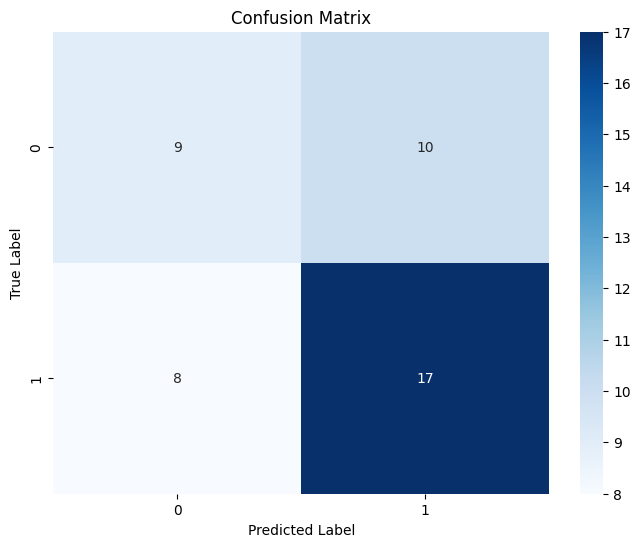

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix for Logistic Regression Model
conf_matrix = confusion_matrix(y_test, y_predict)
actual_labels_LR = ['0', '1']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=actual_labels_LR, yticklabels=actual_labels_LR)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

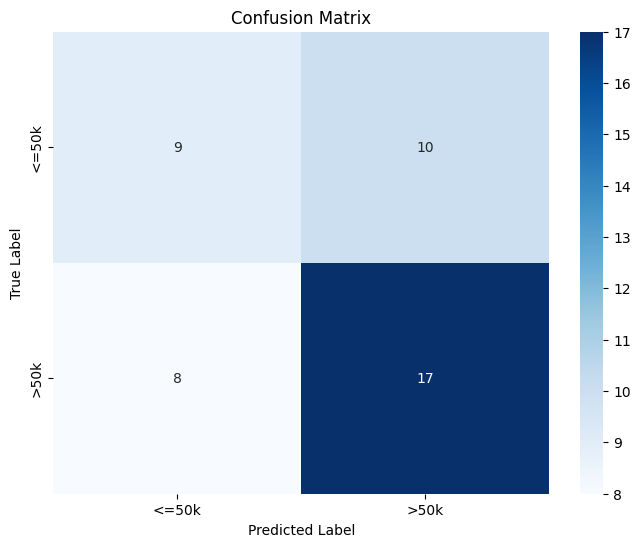

In [75]:
# Generate confusion matrix for Random Forest Classifier Model
conf_matrix = confusion_matrix(y_test, y_predict)
actual_labels_RF = ['<=50k', '>50k']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=actual_labels_RF, yticklabels=actual_labels_RF)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [78]:
#Finding feature importance in Random Forest Classifier Model sorted in descending order
feature_importance = RF.feature_importances_
feature_names = X_train.columns
importance_dict = dict(zip(feature_names, feature_importance))
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
print("Feature Importance:")
for feature, importance in sorted_importance:
    print(f"{feature}: {importance}")

Feature Importance:
coupon: 0.14038695175211172
destination: 0.08462327638250605
passanger: 0.0835505442582477
time: 0.07850541751370614
car: 0.06518093156430915
expiration: 0.054161499466488704
temperature: 0.05393183739130719
toCoupon_GEQ15min: 0.05200136596582752
occupation: 0.03787010476786081
Restaurant20To50: 0.03576112608256113
gender: 0.035262982999617304
Bar: 0.0330615626477371
direction_same: 0.03211266976768279
education: 0.02807514058577942
toCoupon_GEQ25min: 0.027136768392323648
direction_opp: 0.026969555080008877
income: 0.02616796199126322
weather: 0.02436924693231211
age: 0.02429201911658399
CoffeeHouse: 0.02043565183770119
RestaurantLessThan20: 0.014313784117723778
has_children: 0.010651276655950932
maritalStatus: 0.007775296016826488
CarryAway: 0.0034030287135629654
toCoupon_GEQ5min: 0.0


Inference:

So, the priority of the features is as follows:

coupon > destination > passanger > ......

So, whether the coupon is accepted or not depends upon the features like coupon, destination or passanger travelling in the vehicle.